In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [3]:
df = pd.read_csv("./Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.shape
df['itemDescription'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


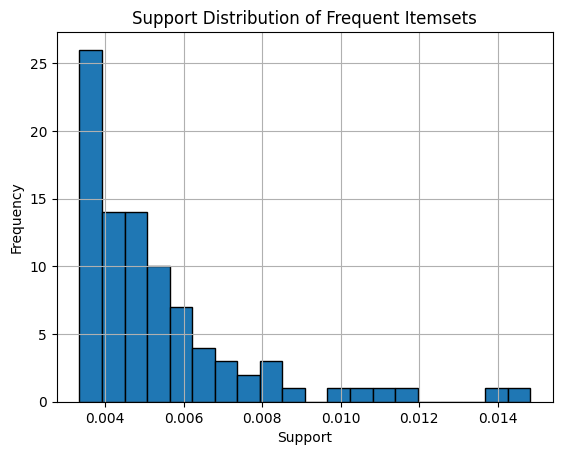

In [29]:
import matplotlib.pyplot as plt

support_values = [metrics['Support'] for (_, _), metrics in frequent_itemsets.items()]


plt.hist(support_values, bins=20, edgecolor='black')
plt.title('Support Distribution of Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [22]:
from collections import defaultdict

class ECLAT:
    def __init__(self, min_support):
        self.min_support = min_support
        self.freq_items = defaultdict(int)
        self.itemset_support = {}

    def fit(self, dataset):

        total_transactions = len(dataset)
        for transaction in dataset:
            for item in transaction:
                self.freq_items[frozenset([item])] += 1


        self.freq_items = {itemset: support for itemset, support in self.freq_items.items() if support >= self.min_support}
        self._generate_frequent_itemsets(dataset, list(self.freq_items.keys()), total_transactions)

    def _generate_frequent_itemsets(self, dataset, freq_itemsets, total_transactions):

        while freq_itemsets:
            new_freq_itemsets = []
            for i, itemset1 in enumerate(freq_itemsets[:-1]):
                for itemset2 in freq_itemsets[i+1:]:
                    new_itemset = itemset1.union(itemset2)

                    support_count = sum(1 for transaction in dataset if new_itemset.issubset(transaction))
                    if support_count >= self.min_support:
                        self.freq_items[new_itemset] = support_count
                        self._calculate_metrics(itemset1, itemset2, support_count, total_transactions)
                        new_freq_itemsets.append(new_itemset)
            freq_itemsets = new_freq_itemsets

    def _calculate_metrics(self, itemset1, itemset2, support_count, total_transactions):
        support_A_and_B = support_count / total_transactions
        support_A = self.freq_items[itemset1] / total_transactions
        confidence = support_A_and_B / support_A if support_A > 0 else 0
        lift = confidence / support_A if support_A > 0 else 0


        self.itemset_support[(itemset1, itemset2)] = {
            'Support': support_A_and_B,
            'Frequency': support_count,
            'Confidence': confidence,
            'Lift': lift
        }

    def get_frequent_itemsets(self):
        return self.itemset_support

eclat = ECLAT(min_support=50)
eclat.fit(dataset)


frequent_itemsets = eclat.get_frequent_itemsets()
for (itemset1, itemset2), metrics in frequent_itemsets.items():
    if metrics['Lift'] > 1:
        print(f"Itemset1: {itemset1}, Itemset2: {itemset2}, Support: {metrics['Support']}, Frequency: {metrics['Frequency']}, Confidence: {metrics['Confidence']}, Lift: {metrics['Lift']}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemset1: frozenset({'sausage'}), Itemset2: frozenset({'whole milk'}), Support: 0.008955423377664907, Frequency: 134, Confidence: 0.14502164502164502, Lift: 2.3484403403234575
Itemset1: frozenset({'sausage'}), Itemset2: frozenset({'yogurt'}), Support: 0.005747510525964045, Frequency: 86, Confidence: 0.09307359307359307, Lift: 1.507207979610577
Itemset1: frozenset({'sausage'}), Itemset2: frozenset({'soda'}), Support: 0.005948005079195348, Frequency: 89, Confidence: 0.09632034632034632, Lift: 1.559785002155132
Itemset1: frozenset({'sausage'}), Itemset2: frozenset({'rolls/buns'}), Support: 0.005346521419501437, Frequency: 80, Confidence: 0.08658008658008658, Lift: 1.4020539345214669
Itemset1: frozenset({'sausage'}), Itemset2: frozenset({'other vegetables'}), Support: 0.006014836596939116, Frequency: 90, Confidence: 0.0974025974025974, Lift: 1.5773106763366502
Itemset1: frozenset({'yogurt'}), Itemset2: frozenset({'other vegetables'}), Support: 0.008086613646995923, Frequency: 121, Confiden

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


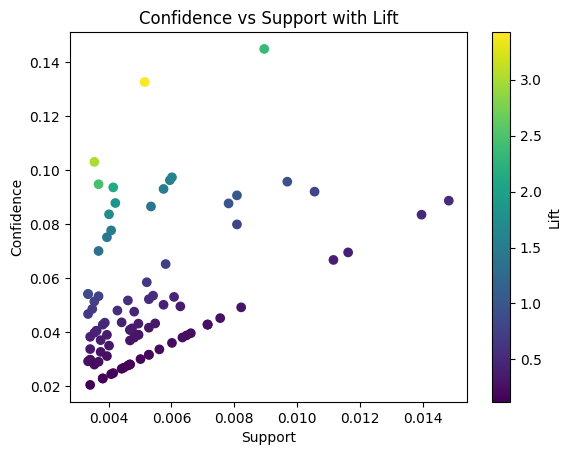

In [26]:
import matplotlib.pyplot as plt

confidences = []
supports = []
lifts = []

for (itemset1, itemset2), metrics in frequent_itemsets.items():
    confidences.append(metrics['Confidence'])
    supports.append(metrics['Support'])
    lifts.append(metrics['Lift'])

plt.scatter(supports, confidences, c=lifts, cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.title('Confidence vs Support with Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


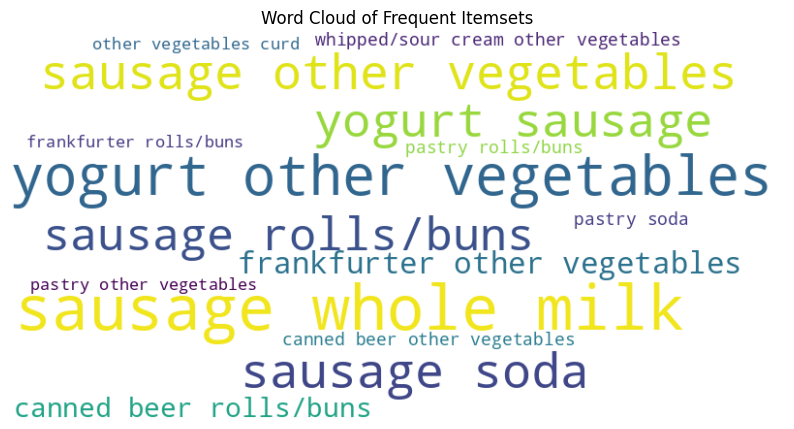

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

itemset_strings = [' '.join(itemset) for itemset in itemsets.keys()]

word_freq = {itemset_strings[i]: itemsets[itemset] for i, itemset in enumerate(itemsets)}


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Itemsets')
plt.show()

